# Black Mirror Database

By Jia Bloom | Date: 6/30/23

The goal of this notebook is to analyze data about *Black Mirror* episodes. To do this, **summary statistics** will be calculated, and the **relationship between variables** will be explored, such as between my rating and IMDb's rating of an episode. Additionally, **visualizations** will be created to illustrate the distribution of the data and the relationship between variables.

This dataset contains the following information:


*   `id`: original primary key of the table
*   `season`: season number
*   `episode`: episode number
*   `title`: episode title
*   `release_date`: when the episode aired
*   `length_min`: how long the episode is in minutes
*   `my_rating`: how much I liked the episode on a 1.0 to 10.0 scale
*   `imdb_rating`: episode average of IMDb user reviews on a 1.0 to 10.0 scale
*   `timeframe`: whether the episode took place in the past, present, or future
*   `network`: whether the episode aired on Channel 4 or Netflix
*   `director`: person who directed the episode
*   `description`: episode description from IMDb


## Setting Up Environment & Importing Data

In [ ]:
# setting up environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import pearsonr

In [ ]:
# import data from csv
bm = pd.read_csv('Joined.csv')

## Previewing & Cleaning Data

In [ ]:
# preview the data
bm.head()

,id,season,episode,title,release_date,length_min,my_rating,imdb_rating,name,name.1,name.2,description
0,1,1,1,The National Anthem,2011-12-04,44,4.5,7.7,present,Channel 4,Otto Bathurst,Prime Minister Michael Callow faces a shocking...
1,2,1,2,Fifteen Million Merits,2011-12-11,62,8.8,8.0,future,Channel 4,Euros Lyn,In a world where people's lives consist of rid...
2,3,1,3,The Entire History of You,2011-12-18,49,9.3,8.5,future,Channel 4,Brian Welsh,"In the near future, everyone has access to a m..."
3,4,2,1,Be Right Back,2013-02-11,49,7.7,8.0,future,Channel 4,Owen Harris,After learning about a new service that lets p...
4,5,2,2,White Bear,2013-02-18,42,6.7,8.0,future,Channel 4,Carl Tibbetts,Victoria wakes up and cannot remember anything...


In [ ]:
# change the columns 'name', 'name.1', and 'name.2' to be more descriptive
new_names = {'name': 'timeframe', 'name.1': 'network', 'name.2': 'director'}
bm.rename(columns = new_names, inplace = True)

# delete id (index serves same purpose)
del bm['id']

In [ ]:
# check changes
bm.head()

,season,episode,title,release_date,length_min,my_rating,imdb_rating,timeframe,network,director,description
0,1,1,The National Anthem,2011-12-04,44,4.5,7.7,present,Channel 4,Otto Bathurst,Prime Minister Michael Callow faces a shocking...
1,1,2,Fifteen Million Merits,2011-12-11,62,8.8,8.0,future,Channel 4,Euros Lyn,In a world where people's lives consist of rid...
2,1,3,The Entire History of You,2011-12-18,49,9.3,8.5,future,Channel 4,Brian Welsh,"In the near future, everyone has access to a m..."
3,2,1,Be Right Back,2013-02-11,49,7.7,8.0,future,Channel 4,Owen Harris,After learning about a new service that lets p...
4,2,2,White Bear,2013-02-18,42,6.7,8.0,future,Channel 4,Carl Tibbetts,Victoria wakes up and cannot remember anything...


In [ ]:
# check for any null values in the dataset
num_nulls = bm.isnull().sum().sum()
print('The number of nulls in the dataset is', num_nulls)

The number of nulls in the dataset is 0


#### Change Data Types

In [ ]:
# find data types
bm.dtypes

season            int64
episode           int64
title            object
release_date     object
length_min        int64
my_rating       float64
imdb_rating     float64
timeframe        object
network          object
director         object
description      object
dtype: object

In [ ]:
# change release_date data type to datetime
bm['release_date'] = pd.to_datetime(bm['release_date'])

# change title, director, and description data types to strings
str_cols = ['title', 'director', 'description']
bm[str_cols] = bm[str_cols].astype('string')

# change timeframe and network data types to categoricals
bm['timeframe'] = bm['timeframe'].astype(
    pd.CategoricalDtype(categories=['past', 'present', 'future']))

bm['network'] = bm['network'].astype(
    pd.CategoricalDtype(categories=['Channel 4', 'Netflix']))

# check the changes
bm.dtypes

season                   int64
episode                  int64
title                   string
release_date    datetime64[ns]
length_min               int64
my_rating              float64
imdb_rating            float64
timeframe             category
network               category
director                string
description             string
dtype: object

## Univariate Analysis

#### Numerical Variables

In [ ]:
# numerical descriptive summary statistics
bm[['length_min', 'my_rating', 'imdb_rating']].describe()

,length_min,my_rating,imdb_rating
count,27.000000,27.000000,27.000000
mean,59.407407,7.066667,7.670370
std,12.677234,1.645273,0.882224
min,41.000000,4.100000,5.300000
25%,50.500000,6.000000,7.300000
50%,59.000000,7.000000,7.700000
75%,68.000000,8.200000,8.350000
max,89.000000,10.000000,9.100000


##### Episode Length

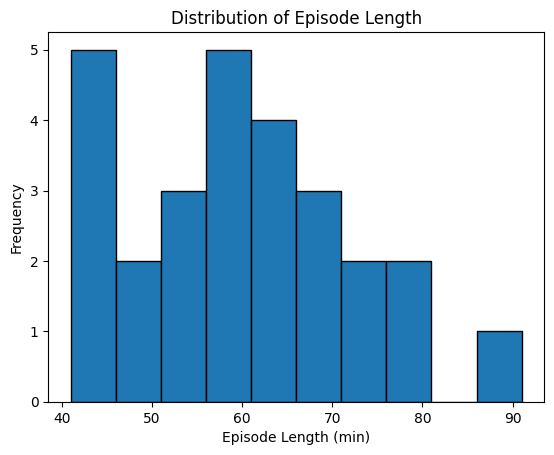

In [ ]:
# set custom bin width
bin_width = 5
bin_edges = np.arange(min(bm['length_min']),
                      max(bm['length_min']) + bin_width,
                      bin_width)

# create histogram
plt.hist(bm['length_min'], bins=bin_edges, edgecolor='black')

# labels
plt.xlabel('Episode Length (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Episode Length')

# show & close plot
plt.show()
plt.close()

#### Categorical Variables

##### Time Frame

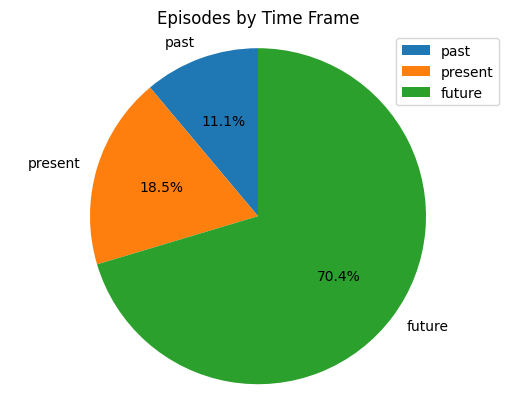

In [ ]:
# pie chart for time frame
labels = ['past', 'present', 'future']
sizes = bm.groupby('timeframe').title.count()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# labels
ax.axis('equal')
ax.legend(labels, loc='best')
plt.title('Episodes by Time Frame')

# show & close plot
plt.show()
plt.close()

##### Network

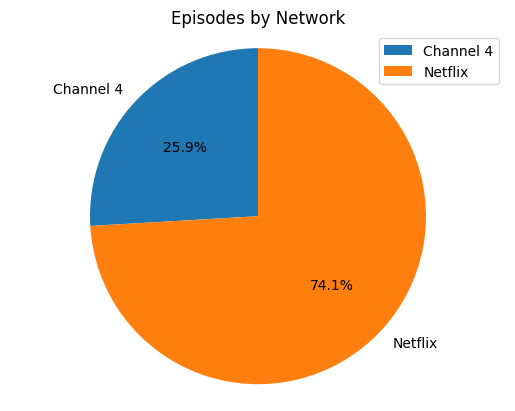

In [ ]:
# pie chart for network
labels = ['Channel 4', 'Netflix']
sizes = bm.groupby('network').title.count()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# labels
ax.axis('equal')
ax.legend(labels, loc='best')
plt.title('Episodes by Network')

# show & close plot
plt.show()
plt.close()

### Multivariate Analysis

#### Episodes by Season

In [ ]:
# creates a series containing the number of episodes per season
season_counts = bm.season.value_counts().sort_index()
print(season_counts)

1    3
2    4
3    6
4    6
5    3
6    5
Name: season, dtype: int64


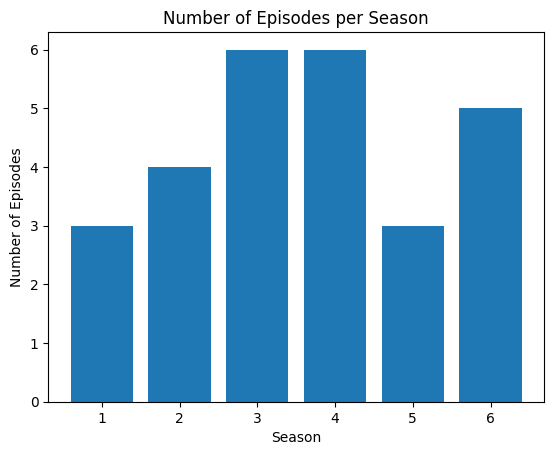

In [ ]:
# bar chart for number of episodes in each season
x_axis = bm['season'].unique()
y_axis = season_counts

plt.bar(x_axis, y_axis)

# labels
plt.title('Number of Episodes per Season')
plt.xlabel('Season')
plt.ylabel('Number of Episodes')

# show & close plot
plt.show()
plt.close()

#### Rating by Season

In [ ]:
# table showing average my_rating & imdb_rating, grouped by season
myrating = bm.groupby('season').my_rating.mean()
imdbrating = bm.groupby('season').imdb_rating.mean()

ratings_byseason = pd.DataFrame({'My Rating': myrating,
                                 'IMDb Rating': imdbrating})

print(ratings_byseason)

        My Rating  IMDb Rating
season                        
1        7.533333     8.066667
2        7.375000     7.925000
3        7.816667     8.233333
4        6.666667     7.800000
5        6.766667     6.833333
6        6.300000     6.900000


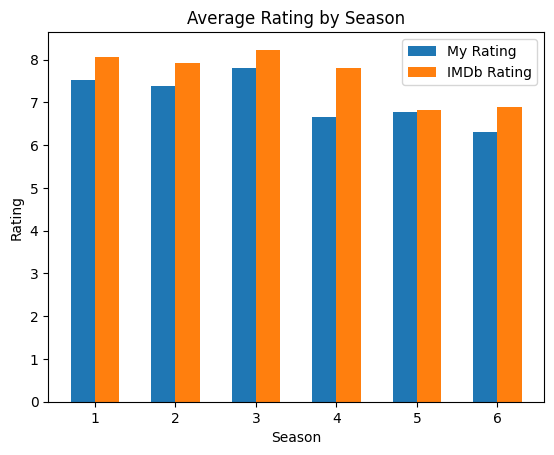

In [ ]:
# clustered bar chart showing the data from the previously created df
categories = [1, 2, 3, 4, 5, 6]

# set the positions of the bars on the x-axis
bar_width = 0.3
x = np.arange(len(categories))

# create the figure and axes
fig, ax = plt.subplots()

# plot bars for each group
rects1 = ax.bar(x - bar_width/2, myrating, bar_width, label='My Rating')
rects2 = ax.bar(x + bar_width/2, imdbrating, bar_width, label='IMDb Rating')

# labels
ax.set_xlabel('Season')
ax.set_ylabel('Rating')
ax.set_title('Average Rating by Season')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# show & close plot
plt.show()
plt.close()

#### Relationship Between My Rating and IMDb Rating

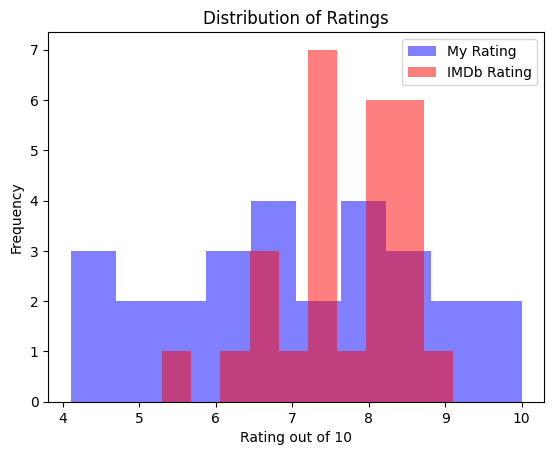

In [ ]:
# stacked histogram of the univariate distribution of my_rating & imdb_rating
plt.hist(bm['my_rating'], color='blue', label='My Rating', alpha=0.5)
plt.hist(bm['imdb_rating'] , color='red', label='IMDb Rating', alpha=0.5)

# labels
plt.legend()
plt.xlabel('Rating out of 10')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

# show & close plot
plt.show()
plt.close()

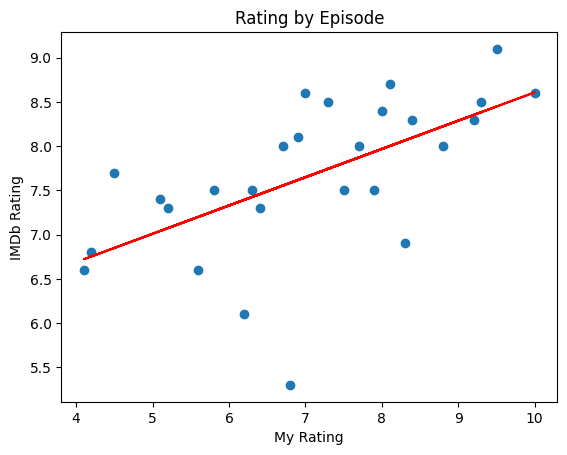

In [ ]:
# scatter plot of my_rating vs. imdb_rating
# calculate line of best fit
m, b = np.polyfit(bm['my_rating'], bm['imdb_rating'], 1) # 1 for linear
line_of_best_fit = m * bm['my_rating'] + b

# create scatterplot
plt.scatter(x = bm['my_rating'], y = bm['imdb_rating'])
plt.plot(bm['my_rating'], line_of_best_fit, color='red')

# create labels
plt.xlabel('My Rating')
plt.ylabel('IMDb Rating')
plt.title('Rating by Episode')

# show plot
plt.show()
plt.close()

In [ ]:
# calculate linear regression stats
m, b = np.polyfit(bm['my_rating'], bm['imdb_rating'], 1)
corr_rating, p = pearsonr(bm['my_rating'], bm['imdb_rating'])
print('y = m * x + b')
print('imdb_rating =', round(m, 2), '* my_rating +', round(b, 2))
print('correlation coefficient: ', round(corr_rating, 4))

y = m * x + b
imdb_rating = 0.32 * my_rating + 5.41
correlation coefficient:  0.5966


## Conclusions



*   The average episode is approximately an **hour long**
*   The majority of episodes (70%) take place in the **future**
*   Most of the episodes (74%) aired on **Netflix**
*   On average, **my ratings are lower** than the IMDb ratings and have a **wider spread** (larger standard deviation)
*   On average, both my ratings and IMDb ratings have been **declining over the seasons**
*   There is a **moderate positive correlation** (r = 0.5966) between my rating and the IMDb rating of an episode, indicating that my opinion on an episode is somewhat in line with the general sentiment of that episode

